In [1]:
a = float(input())
print('%f' % a)

2.5000
2.500000


In [3]:
a, b = map(int, input().split())
print(a,b)

1 2
1 2


## 그래프 알고리즘
+ DFS/BFS 나 최단 경로도 모두 그래프 알고리즘의 한 유형
+ 크루스칼 알고리즘 -> 그리디 알고리즘
+ 위상 정렬 알고리즘 -> 큐 자료구조 OR 스택 자료구조를 활용하여 구현
+ 코딩 테스트에서 ~~가 연결되어 있다 라는 문제가 있으면 첫번째로 그래프 알고리즘을 떠올려야 함
+ 그래프와 더불어 트리 구조도 많이 사용되므로 기억


## 서로소 집합
+ 서로소 : 공통원소가 없는 두 집합
+ 서로소 집합 자료구조 : 서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조
+ 합union 과 찾기find 연사으로 서로소 집합 자료 구조가 구성됨
+ 트리 자료구조를 이용하여 집합을 표현


### 예시
+ 집합 {1,2,3,4,5,6}
+ 유니온 연산 4개
+ union 1,4 union 2,3 union 2,4 union 5,6

  1과 4는 같은 집합 / 2와 3은 같은 집합 / 2와 4는 같은 집합 / 5와 6은 같은 집합
+ 6개의 노드와 4개의 간선으로 이루어진 그래프로 표현 가능
+ 집합 정보를 표현하려면 트리 자료구조를 이용

  큰 번호가 작은 번호를 가리키도록 트리 구성

  작은 번호가 부모노드가 됨
  



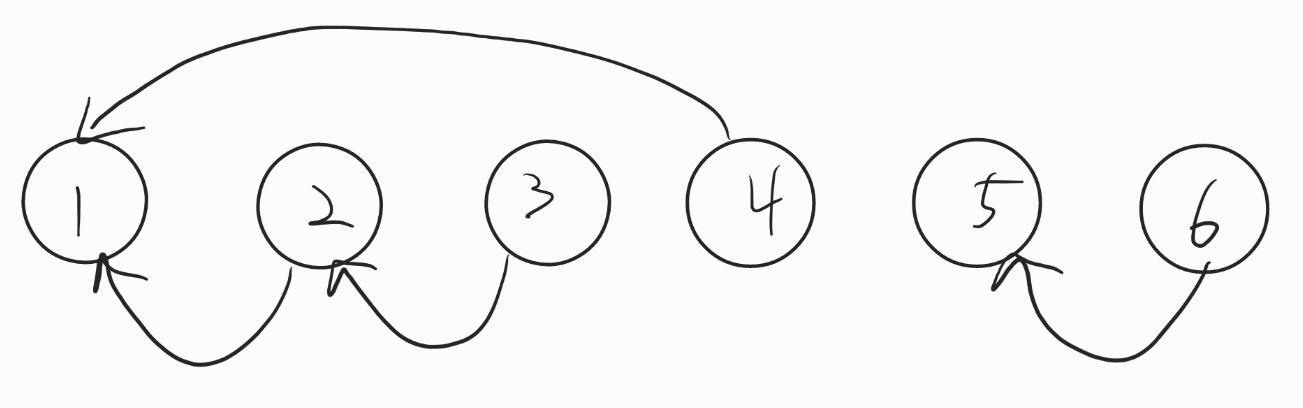

+ 위 그래프에서 노드3에서 노드1로 간접적으로 연결되어 이동할 수 있기 때문에 같은 집합에 있는것으로 이해할 수 있음


In [10]:
# 기본적인 서로소 집합 알고리즘 소스코드
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
  # 루트 노드가 아니라면 루트 노드를 찾을 때까지 재귀적으로 호출
  if parent[x] != x:
    return find_parent(parent, parent[x])
  return x

# 두 원소가 속한 집합 찾기
def union_parent(parent, a, b):
  a = find_parent(parent, a)
  b = find_parent(parent, b)
  if a < b:
    parent[b] = a
  else:
    parent[a] = b
  
# 노드의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화

# 부모 테이블에서 부모를 자기 자신으로 초기화
for i in range(1, v+1):
  parent[i] = i

# union 연산 각각 수행
for i in range(e):
  a, b = map(int, input().split())
  union_parent(parent, a, b)

# 각 원소가 속한 집합 출력
print("각 원소가 속한 집합 : ", end='')
for i in range(1, v+1):
  print(find_parent(parent, i), end=' ')

print()

# 부모 테이블 내용 출력
print('부모 테이블 : ', end = '')
for i in range(1, v+1):
  print(parent[i], end=' ')


6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합 : 1 1 1 1 5 5 
부모 테이블 : 1 1 2 1 5 5 

In [11]:
# 경로 압축 기법 소스코드
def find_parent(parent, x):
  if parent[x] != x:
    parent[x] = find_parent(parent, parent[x])
  return parent[x]

In [13]:
# 개선된 서로소 집합 알고리즘 소스코드
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
  if parent[x] != x:
    parent[x] = find_parent(parent, parent[x])
  return parent[x]

# 두 원소가 속한 집합 찾기
def union_parent(parent, a, b):
  a = find_parent(parent, a)
  b = find_parent(parent, b)
  if a < b:
    parent[b] = a
  else:
    parent[a] = b
  
# 노드의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화

# 부모 테이블에서 부모를 자기 자신으로 초기화
for i in range(1, v+1):
  parent[i] = i

# union 연산 각각 수행
for i in range(e):
  a, b = map(int, input().split())
  union_parent(parent, a, b)

# 각 원소가 속한 집합 출력
print("각 원소가 속한 집합 : ", end='')
for i in range(1, v+1):
  print(find_parent(parent, i), end=' ')

print()

# 부모 테이블 내용 출력
print('부모 테이블 : ', end = '') 
for i in range(1, v+1):
  print(parent[i], end=' ')


6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합 : 1 1 1 1 5 5 
부모 테이블 : 1 1 1 1 5 5 

## 사이클 판별

In [5]:
# 서로소 집합을 활용한 사이클 판별 소스코드
def find_parent(parent, x):
  if parent[x] != x:
    parent[x] = find_parent(parent, parent[x])
  return parent[x]

def union_parent(parent, a, b):
  a = find_parent(parent, a)
  b = find_parent(parent, b)
  if a < b:
    parent[b] = a
  else:
    parent[a] = b

# 노드, 간선 개수
v, e = map(int, input().split())
parent = [0] * (v+1)

for i in range(v+1):
  parent[i] = i

cycle = False # 사이클 발생 여부

for i in range(e):
  a, b = map(int, input().split())
  if find_parent(parent, a) == find_parent(parent, b):
    cycle = True
    break
  else:
    union_parent(parent, a, b)

if cycle:
  print("사이클이 발생했습니다.")
else:
  print("사이클이 발생하지 않았습니다.")

3 3
1 2
1 3
2 3
사이클이 발생했습니다.


## 신장트리
+ 하나의 그래프가 있을 때 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프
+ 모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는다는 조건은 트리의 성립 조건이기도 함


## 크루스칼 알고리즘
+ 신장 트리 중에서 최소 비용으로 만들 수 있는 신장트리를 찾는 알고리즘 -> 최소 신장 트리 알고리즘


In [6]:
# 크루스칼 알고리즘
def find_parent(parent, x):
  if parent[x] != x:
    parent[x] = find_parent(parent, parent[x])
  return parent[x]

def union_parent(parent, a, b):
  a = find_parent(parent, a)
  b = find_parent(parent, b)
  if a < b:
    parent[b] = a
  else:
    parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v+1)

# 모든 간선 정보를 담을 리스트와 최종 비용을 담을 변수 생성
edges = []
result = 0

for i in range(v+1):
  parent[i] = i

for _ in range(e):
  a, b, cost = map(int, input().split())
  edges.append((cost, a, b))

# 간선을 비용순으로 정렬
edges.sort()

for edge in edges:
  cost, a, b = edge
  # 사이클이 발생하지 않는 경우에만 집합에 포함
  if find_parent(parent, a) != find_parent(parent, b):
    union_parent(parent, a, b)
    result += cost

print(result)

7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
159


## 위상 정렬
+ 방향 그래프의 모든 노드를 '방향성에 거스르지 않도록 순서대로 나열하는 것'
+ 예시 -> 선수과목을 고려한 학습 순서 설정
  - 자료구조 과목을 수강한뒤 알고리즘 강의 수강을 권장
  - 이때 자료구조 및 알고리즘을 각각의 노드로 표현하고 자료구조에서 알고리즘으로 이어질 수 있도록 방향성을 갖는 간선을 그릴 수 있음
+ 위상 정렬 알고리즘
1. 진입차수가 0인 노드를 큐에 넣는다.
2. 큐가 빌 때까지 다음의 과정을 반복한다.
  1. 큐에서 원소를 꺼내 해당 노드에서 출발하는 간선을 그래프에서 제거한다.
  2. 새롭게 진입차수가 0이 된 노드를 큐에 넣는다.

In [9]:
# 위상 정렬 소스코드
from collections import deque

# 노드, 간선
v, e = map(int, input().split())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v+1)
# 그래프 초기화 
graph = [[] for _ in range(v+1)]

# 방향 그래프의 모든 간선 입력받기
for _ in range(e):
  a, b = map(int, input().split())
  graph[a].append(b)
  indegree[b] += 1

# 위상 정렬 함수
def topology_sort():
  result = []
  q = deque()

  # 진입차수가 0인 노드 큐에 삽입
  for i in range(1, v+1):
    if indegree[i] == 0:
      q.append(i)

  while q: # 큐가 빌 때까지 반복
    now = q.popleft()
    result.append(now)
    # 해당 원소와 연결된 노드들의 진입차수에서 1빼기
    for i in graph[now]:
      indegree[i] -= 1
      if indegree[i] == 0:
        q.append(i)

  for i in result:
    print(i, end=' ')

topology_sort()

7 8
1 2
1 5
2 3
2 6
3 4
4 7
5 6
6 4
1 2 5 3 6 4 7 

## 팀 결성


In [11]:
def find_parent(parent, x):
  if parent[x] != x:
    parent[x] = find_parent(parent, parent[x])
  return parent[x]

def union_parent(parent, a, b):
  a = find_parent(parent, a)
  b = find_parent(parent, b)
  if a < b:
    parent[b] = a
  else:
    parent[a] = b

n, m = map(int, input().split())
parent = [0] * (n+1)
for i in range(0, n+1):
  parent[i] = i

# 각 연산 확인
for i in range(m):
  oper, a, b = map(int, input().split())
  # union인 경우
  if oper == 0:
    union_parent(parent, a, b)
  elif oper == 1:
    if find_parent(parent, a) == find_parent(parent, b):
      print("YES")
    else:
      print("NO")

7 8
0 1 3
1 1 7
NO
0 7 6
1 7 1
NO
0 3 7
0 4 2
0 1 1
1 1 1
YES


## 도시 분할 계획

In [13]:
def find_parent(parent, x):
  if parent[x] != x:
    parent[x] = find_parent(parent, parent[x])
  return parent[x]

def union_parent(parent, a, b):
  a = find_parent(parent, a)
  b = find_parent(parent, b)
  if a < b:
    parent[b] = a
  else:
    parent[a] = b

# 노드, 간선
v, e = map(int, input().split())
parent = [0] * (v+1)

edges = []
result = 0

for i in range(1, v+1):
  parent[i] = i

# 간선에 대한 정보
for _ in range(e):
  a, b, cost = map(int, input().split())
  edges.append((cost, a, b))

edges.sort()
last = 0 # 최소 신장 트리에 포함되는 간선 중 가장 비용이 큰 간선을 위한 공간

for edge in edges:
  cost, a, b = edge
  # 사이클이 발생하지 않는 경우에만 집합에 포함
  if find_parent(parent, a) != find_parent(parent, b):
    union_parent(parent, a, b)
    result += cost
    last = cost

print(result - cost)

7 12 
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4
6


## 커리큘럼

In [22]:
from collections import deque
import copy

v = int(input())

indegree = [0] * (v+1)

graph = [[] for i in range(v+1)]
time = [0] * (v+1)

for i in range(1, v+1):
  data = list(map(int, input().split()))
  time[i] = data[0]
  for x in data[1:-1]:
    indegree[i] += 1
    graph[x].append(i)

def topology_sort():
  result = copy.deepcopy(time) # 알고리즘 수행 결과를 담을 리스트
  q = deque()

  for i in range(1, v+1):
    if indegree[i] == 0:
      q.append(i)

  while q:
    now = q.popleft()
    for i in graph[now]:
      result[i] = max(result[i], result[now] + time[i])
      indegree[i] -= 1
      if indegree == 0:
        q.append(i)

  for i in range(1, v+1):
    print(result[i])

topology_sort()

5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
10
20
14
14
3


In [16]:
data = [4,3,1,-1]
for x in data[1:-1]:
  print(x)

3
1
